In [14]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [15]:
labelsfile = 'Data/MNIST/train-labels-idx1-ubyte'
datafile = 'Data/MNIST/mnist.mm'
mm = np.memmap(labelsfile, dtype=np.uint8, offset=8)

In [16]:
nn = list(np.arange(mm.min(), mm.max() + 1))
print(nn)
b = LabelBinarizer()
b.fit(nn)

p = b.transform(mm)
p.shape


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(60000, 10)

In [17]:
del mm

In [18]:
mmp = np.memmap('Data/MNIST/labels.mm', mode='w+', shape=p.shape, dtype=np.float32)
mmp[:] = p

In [19]:
mmp.flush()
del mmp

In [13]:
p

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [20]:
m3 = np.memmap(datafile, dtype='float32', offset=128,
              mode='r')
m3 = np.reshape(m3, (p.shape[0], 28, 28, -1))

In [21]:
m3.shape

(60000, 28, 28, 1)

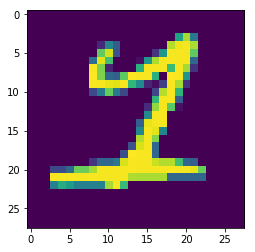

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
from matplotlib import pyplot as plt
plt.imshow(m3[4502,:,:,0])
plt.show()
p[4502]